# Boston Housing

In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [10]:
data = pd.DataFrame(data=boston.data,columns=boston.feature_names)
target = pd.DataFrame(data=boston.target,columns=["TARGET"])
df = pd.concat([data,target],axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
df.shape

(506, 14)

In [12]:
df.corr()["TARGET"]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
TARGET     1.000000
Name: TARGET, dtype: float64

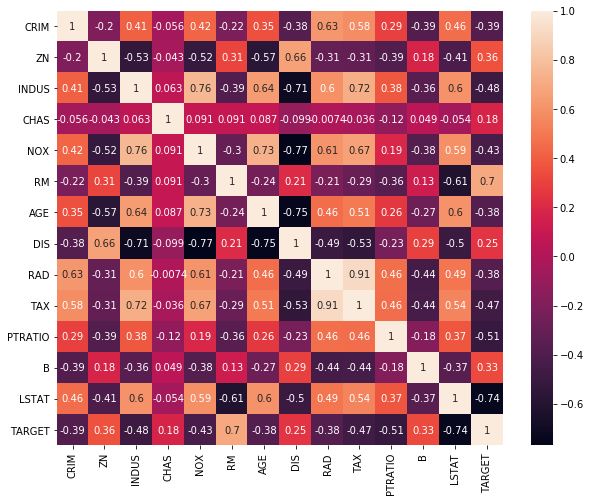

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True);

In [16]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

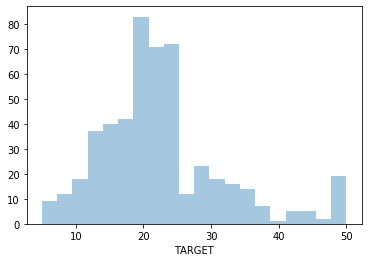

In [18]:
sns.distplot(df["TARGET"],bins=20,kde=False);

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop("TARGET",axis=1).values
y = df["TARGET"].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [89]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [80]:
from sklearn.metrics import r2_score, mean_squared_error

### Linear Regression 

In [81]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_sc,y_train)
lr_tr_predict = lin_reg.predict(X_train_sc)
lr_ts_predict = lin_reg.predict(X_test_sc)
print("Score of trainig set : ",r2_score(y_train,lr_tr_predict))
print("Score of test set : ",r2_score(y_test,lr_ts_predict))

Score of trainig set :  0.7697699488741149
Score of test set :  0.6354638433202122


### Ridge Regression 

In [93]:
ridg = Ridge(alpha=1)
ridg.fit(X_train_sc,y_train)
ridg_tr_predict = ridg.predict(X_train_sc)
ridg_ts_predict = ridg.predict(X_test_sc)
print("Score of trainig set : ",r2_score(y_train,ridg_tr_predict))
print("Score of test set : ",r2_score(y_test,ridg_ts_predict))

Score of trainig set :  0.7656443349364728
Score of test set :  0.6214583227921033


### K-Neighbors Regressor (Overfit issue)

In [82]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_sc,y_train)
knn_tr_predict = knn.predict(X_train_sc)
knn_ts_predict = knn.predict(X_test_sc)
print("Score of trainig set : ",r2_score(y_train,knn_tr_predict))
print("Score of test set : ",r2_score(y_test,knn_ts_predict))

Score of trainig set :  0.9015618226600137
Score of test set :  0.6177749492293981


### Support Vector Regressor 

In [83]:
svr = SVR(kernel="poly",C=10,epsilon=0.01)
svr.fit(X_train_sc,y_train)
svr_tr_predict = svr.predict(X_train_sc)
svr_ts_predict = svr.predict(X_test_sc)
print("Score of trainig set : ",r2_score(y_train,svr_tr_predict))
print("Score of test set : ",r2_score(y_test,svr_ts_predict))

Score of trainig set :  0.9188513591801433
Score of test set :  0.7739538188641494


### Decision Tree Regressor

In [84]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_tr_predict = dtr.predict(X_train)
dtr_ts_predict = dtr.predict(X_test)
print("Score of trainig set : ",r2_score(y_train,dtr_tr_predict))
print("Score of test set : ",r2_score(y_test,dtr_ts_predict))

Score of trainig set :  1.0
Score of test set :  0.6680460001234553
